# IMT 573 1.1.6 Problem Set 1 - First Data Science Report

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

5. Partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are *strongly* encouraged to attempt each question and document their reasoning process even if they cannot find the correct answer. 

6. After completing the assignment, ensure that your code can run from start to finish without issue. Restart the kernal and run all cells to double check.

Name: Steve Gonzales

Collaborators: None

Google Gemini used to demonstrate how to use Pandas Correlation (could not get it to work; switched to Numpy.correlate); reference clearly cited.<p>
All other code is my own.

In [2]:
!pip install scikit-learn

For this assignment, you'll need (at least) the following packages. If the package does not load, be sure it is properly installed.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

### Problem 1: Load a dataset

Choose a dataset from the sklearn [toy dataset repository](https://scikit-learn.org/stable/datasets/toy_dataset.html). Load the data and provide a brief description of the data. At a minimum, describe the shape of the data, how many observations it contains, how many variables it contains, and what type of data it contains.

In [2]:
import pandas as pd
from sklearn.datasets import load_linnerud

In [49]:
def get_linnerud_data():
    """Function to retrieve linnerud data and return a single merged DF
    Chins  Situps  Jumps  Weight  Waist  Pulse
0     5.0   162.0   60.0   191.0   36.0   50.0
    """
    linnerud = load_linnerud()
    df_feature = pd.DataFrame(data=linnerud.data, columns=linnerud.feature_names)
    df_target = pd.DataFrame(data=linnerud.target, columns=linnerud.target_names)

    # Combine the DFs and return
    idx = pd.Index(range(max(len(df_feature), len(df_target))), name='person')
    df = df_feature.merge(df_target, left_index=True, right_index=True)
    df.set_index(idx, inplace=True)
    return df
df = get_linnerud_data()
display(df)

,Chins,Situps,Jumps,Weight,Waist,Pulse
person,,,,,,
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0


In [50]:
desc = """I have chosen the Linnerud data set which contains physiological and activity (exercises) data 
 collected from twenty middle-aged men in a fitness club:

Physiological variables:
Weight, Waist and Pulse.

Exercise variables:
Chins, Situps and Jumps.
"""
print(desc)

# Load the Linnerud dataset
df = get_linnerud_data()

print("Feature Names:", list(df.columns[:3]))
# Print the first few data points
print("Sample Feature data:\n", df.iloc[:4, :3])
print(f"There are {len(df.iloc[:, :3])} total rows of feature data")
print('')
print("Target Names:", list(df.columns[3:]))
# Print the first few target values
print("Sample Target data:\n", df.iloc[:4, 3:])
print(f"There are {len(df.iloc[:, 3:])} total rows of target data")

I have chosen the Linnerud data set which contains physiological and activity (exercises) data 
 collected from twenty middle-aged men in a fitness club:

Physiological variables:
Weight, Waist and Pulse.

Exercise variables:
Chins, Situps and Jumps.

Feature Names: ['Chins', 'Situps', 'Jumps']
Sample Feature data:
         Chins  Situps  Jumps
person                      
0         5.0   162.0   60.0
1         2.0   110.0   60.0
2        12.0   101.0  101.0
3        12.0   105.0   37.0
There are 20 total rows of feature data

Target Names: ['Weight', 'Waist', 'Pulse']
Sample Target data:
         Weight  Waist  Pulse
person                      
0        191.0   36.0   50.0
1        189.0   37.0   52.0
2        193.0   38.0   58.0
3        162.0   35.0   62.0
There are 20 total rows of target data


### Problem 2: Create a visualization

Create a visualization of the data you chose.

In [51]:
# Create a Pandas Dataframe with the data
# It is not specified, but I am assuming that the order is consistent, 
#  ie row 1 of features is person 1 and row 1 of target is person 1
df = get_linnerud_data()
print(df)

        Chins  Situps  Jumps  Weight  Waist  Pulse
person                                            
0         5.0   162.0   60.0   191.0   36.0   50.0
1         2.0   110.0   60.0   189.0   37.0   52.0
2        12.0   101.0  101.0   193.0   38.0   58.0
3        12.0   105.0   37.0   162.0   35.0   62.0
4        13.0   155.0   58.0   189.0   35.0   46.0
5         4.0   101.0   42.0   182.0   36.0   56.0
6         8.0   101.0   38.0   211.0   38.0   56.0
7         6.0   125.0   40.0   167.0   34.0   60.0
8        15.0   200.0   40.0   176.0   31.0   74.0
9        17.0   251.0  250.0   154.0   33.0   56.0
10       17.0   120.0   38.0   169.0   34.0   50.0
11       13.0   210.0  115.0   166.0   33.0   52.0
12       14.0   215.0  105.0   154.0   34.0   64.0
13        1.0    50.0   50.0   247.0   46.0   50.0
14        6.0    70.0   31.0   193.0   36.0   46.0
15       12.0   210.0  120.0   202.0   37.0   62.0
16        4.0    60.0   25.0   176.0   37.0   54.0
17       11.0   230.0   80.0   

In [31]:
!pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ------------------------------------- 948.2/948.2 kB 14.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139014 sha256=bf4ce82e7ee1c861decb9614305fe3a63d51cf3641f03bb5c21e07d31c1e7889
  Stored in directory: c:\users\steve\appdata\local\pip\cache\wheels\ff\6c\15\506e25bc390de450a7fa53c155cd9b0fbd13ad3e84a9abc183
Successfully built peewee


In [7]:
# Example code from Google Gemini to better understand how Correlation works
# Google. (2024) Gemini v1.5
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the tickers of the stocks
ticker1 = "AAPL"  # Apple
ticker2 = "MSFT"  # Microsoft

# Download historical data of AAPL and MSFT
data = yf.download(tickers=[ticker1, ticker2], period="1y")

[*********************100%***********************]  2 of 2 completed


In [8]:
# Inspect data
data[:5]

Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2024-01-08  184.655365  372.653351  184.695178  373.160588  180.615161   
2024-01-09  184.237411  373.747375  184.247357  373.946270  181.839157   
2024-01-10  185.282318  380.689392  185.491286  382.081806  183.023380   
2024-01-11  184.685226  382.539337  186.138115  388.556440  182.724829   
2024-01-12  185.013611  386.358429  185.829621  386.567279  184.287174   

Price                         Open                Volume            
Ticker            MSFT        AAPL        MSFT      AAPL      MSFT  
Date                                                                
2024-01-08  367.004232  181.202281  367.292634  59144500  23134000  
2024-01-09  369.172373  183.023358  369.987923  42841800  20830000  
2024-01-10  374.274470  183.451292  374.324186  46792900  25514200  
2024-01-11  378.312438  185.630592  383.901886  49128400  27850800  
2024-01-12  382.559186  185.152928  383.394616  40444700  21645700

Correlation between AAPL and MSFT: 0.47


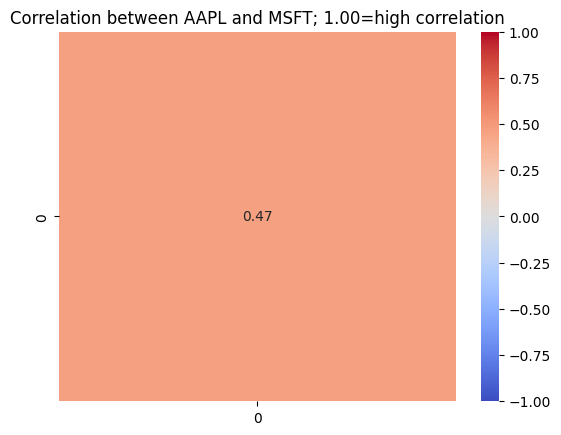

In [9]:
# Google. (2024) Gemini v1.5
# Calculate daily returns
data_close = data["Close"]
returns = data_close.pct_change()

# Calculate correlation coefficient
correlation = returns[ticker1].corr(returns[ticker2])

# Print the correlation coefficient
print(f"Correlation between {ticker1} and {ticker2}: {correlation:.2f}")

# Create a heatmap (optional)
sns.heatmap(pd.DataFrame(data=[[correlation]]), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title(f"Correlation between {ticker1} and {ticker2}; 1.00=high correlation")
plt.show()

In [28]:
# corrwith Does not work
# Trying corrwith, but unable to get it to work. Will only produce NaN
# The example in Pandas is comical: shows 1.0 correlation with itself.
df_appl = pd.DataFrame(returns[ticker1])
df_msft = pd.DataFrame(returns[ticker2])
display(df_appl)
if False:
    correlation_2 = df_appl.corrwith(df_msft, axis='columns', method='pearson', numeric_only=True)
    # Print the correlation coefficient
    print(f"Correlation between {ticker1} and {ticker2}: {correlation_2.mean():.2f}")
    # Create a heatmap (optional)
    sns.heatmap(pd.DataFrame(data=[[correlation_2]]), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"Correlation between {ticker1} and {ticker2}; 1.00=high correlation")
    plt.show()

,AAPL
Date,
2024-01-08,NaN
2024-01-09,-0.002263
2024-01-10,0.005672
2024-01-11,-0.003223
2024-01-12,0.001778
...,...
2024-12-31,-0.007058
2025-01-02,-0.026236
2025-01-03,-0.002009


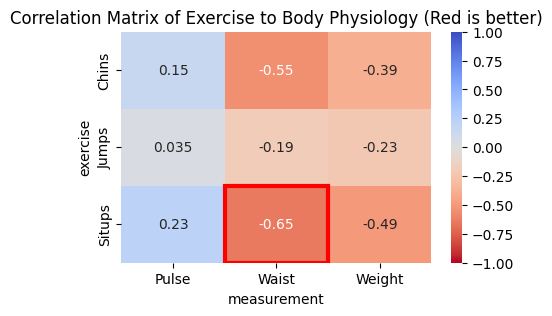

Best Inverse Correlation: ['Situps', 'Waist', -0.6455980279273232]


In [104]:
# Apply what we learned about Correlation (above) to the Linnerud data
# We want an inverse correlation between Exercise (high=good=red) and Measure (low=good=red)
# Tried Pandas .corr but it is problematic and doesn't like subsets of a DF
# Visualize in a heat map and draw a rectangle around the best correlation
import numpy as np
from matplotlib.patches import Rectangle

# reload data
df = get_linnerud_data()

# Calculate correlations between exercises and measurements
# A 3x3 matrix gives us 9 correlation pairs
correlations = []
for exercise in df.columns[:3]:
    for measure in df.columns[3:]:
        correlation = np.corrcoef(list(df[exercise]), list(df[measure]))[0, 1]
        correlations.append([exercise, measure, correlation])

# Visualize the data on a Heat Map
# Show the best inverse correlation as blue and the worst as red
corr_df = pd.DataFrame(correlations, columns=['exercise', 'measurement', 'correlation'])
corr_matrix_df = corr_df.pivot(index='exercise', columns='measurement', values='correlation')

# Sort the correlations by the strongest negative correlation
correlations.sort(key=lambda x: x[2])
# The strongest inverse correlation will be the first in the sorted list
best_inverse_correlation = correlations[0]
x, y = best_inverse_correlation[0], best_inverse_correlation[1]

# Display the Heatmap from Red (-1) to Blue (1) using coolwarm_r (_r reverses it)
plt.figure(figsize=(5, 3))
ax = sns.heatmap(corr_matrix_df, annot=True, cmap="coolwarm_r", vmin=-1, vmax=1)

# Get the coordinates of the best correlation in the heatmap
x_coord = list(corr_matrix_df.index).index(x)  # Row index
y_coord = list(corr_matrix_df.columns).index(y)  # Column index

# Draw a rectangle around the best correlation
ax.add_patch(Rectangle((y_coord, x_coord), 1, 1, fill=False, edgecolor='red', lw=3))

plt.title("Correlation Matrix of Exercise to Body Physiology (Red is better)")
plt.show()

print("Best Inverse Correlation:", best_inverse_correlation)